In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("../data/processed/final_data.csv")

In [3]:

# Các cột cần mã hóa
ordinal_features = [' khoa', ' hedt', ' chuyennganh2']

df[ordinal_features] = df[ordinal_features].fillna('Unknown')

encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df[ordinal_features])

df_encoded = pd.DataFrame(df_encoded, columns=[f"{col}_mahoa" for col in ordinal_features], index=df.index)

df = pd.concat([df, df_encoded], axis=1)

df.drop(columns=ordinal_features, inplace=True)


print(df.head())


                                       mssv  hocky  namhoc  dtbhk  sotchk  \
0  0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6    2.0  2021.0   8.28    21.0   
1  0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6    1.0  2022.0   7.56    16.0   
2  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    2.0  2019.0   9.00    21.0   
3  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    1.0  2020.0   9.11    15.0   
4  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    2.0  2020.0   8.75    19.0   

        id   namsinh   gioitinh     noisinh      lopsh   khoahoc   tinhtrang  \
0      NaN       NaN        NaN         NaN        NaN       NaN         NaN   
1      NaN       NaN        NaN         NaN        NaN       NaN         NaN   
2  18570.0    2001.0        0.0   'Nghệ An'   TMĐT2019      14.0         1.0   
3  18570.0    2001.0        0.0   'Nghệ An'   TMĐT2019      14.0         1.0   
4  18570.0    2001.0        0.0   'Nghệ An'   TMĐT2019      14.0         1.0   

     diachi_tinhtp Column1  dtbhk2   khoa_mahoa   hedt_m

In [4]:
# Xử lý NaN
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# Chọn biến đầu vào và đầu ra
X = df.drop(columns=['nhom', 'dtbhk', 'id', ' namsinh', 'mssv', ' noisinh', ' diachi_tinhtp', 'Column1', ' lopsh'], errors='ignore')  # Xóa cột không cần thiết
y = df['dtbhk']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66139 entries, 0 to 66138
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mssv                 66139 non-null  object 
 1   hocky                66139 non-null  float64
 2   namhoc               66139 non-null  float64
 3   dtbhk                66139 non-null  float64
 4   sotchk               66139 non-null  float64
 5   id                   66139 non-null  float64
 6    namsinh             66139 non-null  float64
 7    gioitinh            66139 non-null  float64
 8    noisinh             66139 non-null  object 
 9    lopsh               66139 non-null  object 
 10   khoahoc             66139 non-null  float64
 11   tinhtrang           66139 non-null  float64
 12   diachi_tinhtp       66139 non-null  object 
 13  Column1              66139 non-null  object 
 14  dtbhk2               66139 non-null  float64
 15   khoa_mahoa          66139 non-null 

In [6]:
X.head(5)

,hocky,namhoc,sotchk,gioitinh,khoahoc,tinhtrang,dtbhk2,khoa_mahoa,hedt_mahoa,chuyennganh2_mahoa
0,2.0,2021.0,21.0,1.0,11.0,1.0,7.79,6.0,5.0,12.0
1,1.0,2022.0,16.0,1.0,11.0,1.0,8.28,6.0,5.0,12.0
2,2.0,2019.0,21.0,0.0,14.0,1.0,8.84,1.0,2.0,9.0
3,1.0,2020.0,15.0,0.0,14.0,1.0,9.00,1.0,2.0,9.0
4,2.0,2020.0,19.0,0.0,14.0,1.0,9.11,1.0,2.0,9.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# tập Test
y_pred = rf_model.predict(X_test)

# Đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 0.8573227922533151
Mean Squared Error (MSE): 1.5506936679462373
Root Mean Squared Error (RMSE): 1.2452685123884877
R^2 Score: 0.5826428837962947


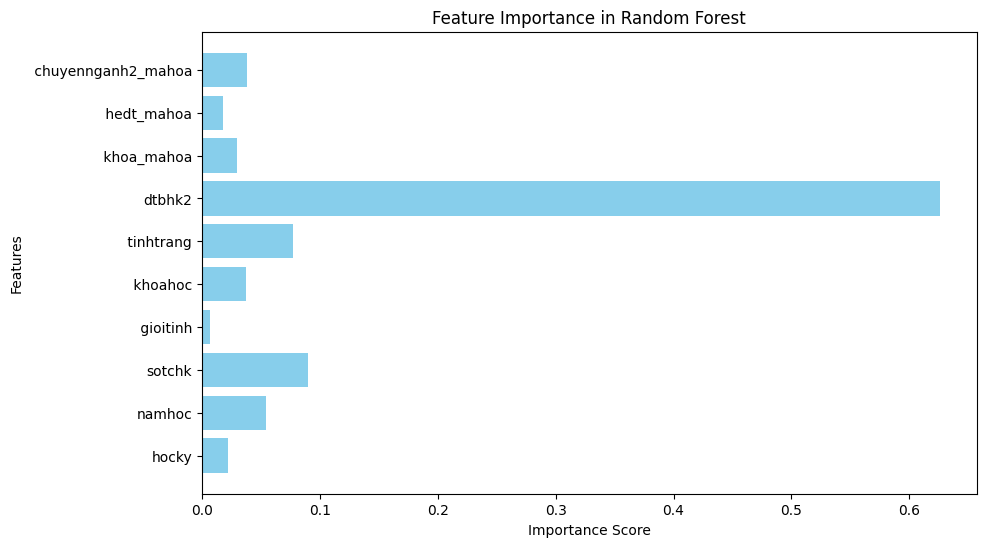

In [10]:

# Tầm quan trọng của thuộc tính
feature_importances = rf_model.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


In [11]:
test_row = pd.DataFrame({
    'hocky': [2.0],
    'namhoc': [2021.0],
    'sotchk': [21.0],
    ' gioitinh': [1.0],
    ' khoahoc': [11.0],
    ' tinhtrang': [1.0],
    'dtbhk2': [5],
    ' khoa_mahoa': [2.0],
    ' hedt_mahoa': [1.0],
    ' chuyennganh2_mahoa': [4.0]
})

In [12]:
test_row.head(5)

,hocky,namhoc,sotchk,gioitinh,khoahoc,tinhtrang,dtbhk2,khoa_mahoa,hedt_mahoa,chuyennganh2_mahoa
0,2.0,2021.0,21.0,1.0,11.0,1.0,5,2.0,1.0,4.0


In [13]:
predicted_dtb = rf_model.predict(test_row)
print(f"Dự đoán DTBHK: {predicted_dtb[0]:.2f}")

Dự đoán DTBHK: 4.83


In [14]:
joblib.dump(rf_model, '../models/random_forest_model.pkl')
# rf_model = joblib.load('random_forest_dtbhk_model.pkl')


['../models/random_forest_model.pkl']